# Tarea 5
## Francisco Javier Peralta Ramírez

Implementar PCA (Eigenfaces) usando librerías de Python

In [49]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, NMF
from sklearn.datasets import fetch_mldata

In [50]:
# Load data
mnist = fetch_mldata('MNIST original')

/home/jperalta/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/jperalta/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


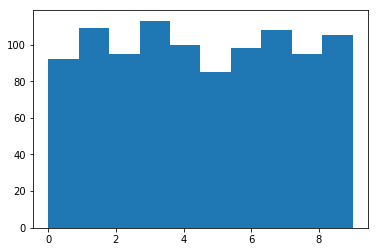

In [98]:
n_data = 1000
w, h = 28, 28
idx = np.random.randint(0,len(mnist.data), n_data) #seleccionamos indices aleatorios
X = mnist.data[idx]
Y = mnist.target[idx]
n_features = X.shape[1]
plt.hist(Y) #checamos que tan bien distribuidos estan
plt.show()

Graficamos las primeras diez imagenes

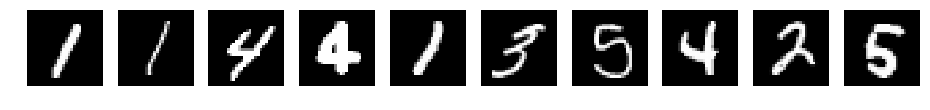

In [161]:
n_plots=10
f, ax = plt.subplots(1, n_plots, figsize=(16, 6))
for i in range(n_plots):
    ax[i].imshow(X[i].reshape(28, 28), cmap='gray')
    ax[i].axis('off')
plt.show()

In [100]:
%%time
n_components = 100
pca = PCA(100).fit(X)

CPU times: user 1.88 s, sys: 2.03 s, total: 3.91 s
Wall time: 340 ms


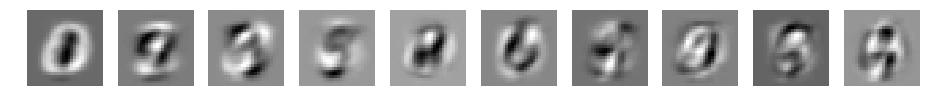

In [109]:
eigen_numbers = pca.components_.reshape(n_components, h, w)
f, ax = plt.subplots(1, n_plots, figsize=(16, 6))
for i in range(n_plots):
    ax[i].imshow(eigen_numbers[i], cmap='gray')
    ax[i].axis('off')
plt.show()

In [110]:
X_pca = pca.transform(X)

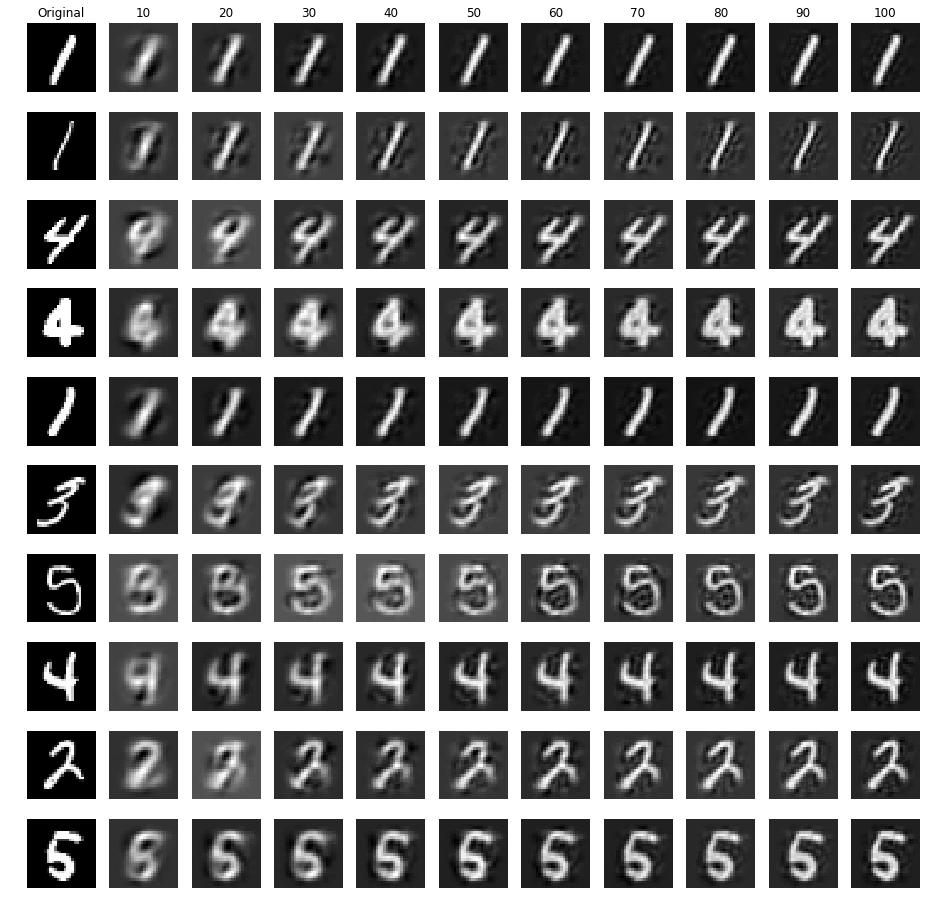

In [159]:
n_plots=11
idx = 10
f, ax = plt.subplots(10, n_plots, figsize=(16, 16))
ax[0][0].set_title("Original")
for k in range(10):
    img = (np.sum(X, axis=0)/1000).reshape(h, w) #iniciamos con imagen promedio
    ax[k][0].imshow(X[k].reshape(28,28), cmap='gray')
    ax[k][0].axis('off')
    for i in range(1, n_plots):
        for j in range(10):
            ij = (i-1) * 10 + j
            img += X_pca[k][ij] * eigen_numbers[ij] #sumamos cada eigen_numero pesado
        ax[k][i].axis('off')
        ax[k][i].imshow(img, cmap='gray')
        if(k == 0) : ax[k][i].set_title(i*10)